IMPORT ALL REQUIRED PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler


LOAD THE DATA SET

In [2]:
credit=pd.read_csv('/content/creditcard.csv')

In [3]:
credit.shape

(43664, 31)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43664 entries, 0 to 43663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43664 non-null  int64  
 1   V1      43664 non-null  float64
 2   V2      43664 non-null  float64
 3   V3      43664 non-null  float64
 4   V4      43664 non-null  float64
 5   V5      43664 non-null  float64
 6   V6      43664 non-null  float64
 7   V7      43664 non-null  float64
 8   V8      43664 non-null  float64
 9   V9      43664 non-null  float64
 10  V10     43664 non-null  float64
 11  V11     43664 non-null  float64
 12  V12     43664 non-null  float64
 13  V13     43664 non-null  float64
 14  V14     43664 non-null  float64
 15  V15     43664 non-null  float64
 16  V16     43664 non-null  float64
 17  V17     43664 non-null  float64
 18  V18     43664 non-null  float64
 19  V19     43664 non-null  float64
 20  V20     43664 non-null  float64
 21  V21     43664 non-null  float64
 22

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,43664.00000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,...,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43663.000000,43663.000000,43663.000000,43663.000000
mean,26888.25284,-0.233273,0.031606,0.700508,0.191731,-0.243618,0.099239,-0.117611,0.051499,0.173603,...,-0.026792,-0.110075,-0.039981,0.009712,0.136448,0.022633,0.006871,0.005107,90.313927,0.003069
std,12814.99066,1.881487,1.614103,1.524287,1.407338,1.409001,1.310495,1.272765,1.214443,1.226176,...,0.739609,0.637124,0.568360,0.592318,0.437462,0.503349,0.390445,0.342269,238.441952,0.055314
min,0.00000,-56.407510,-72.715728,-32.454198,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-8.507059,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,18719.75000,-0.980241,-0.538882,0.225681,-0.715653,-0.848251,-0.637897,-0.599128,-0.149257,-0.579444,...,-0.233410,-0.530920,-0.179112,-0.321968,-0.128037,-0.329466,-0.063372,-0.006848,7.570000,0.000000
50%,31883.00000,-0.244783,0.091807,0.804944,0.190472,-0.277415,-0.155863,-0.072568,0.053267,0.053757,...,-0.072254,-0.084865,-0.051512,0.062302,0.175968,-0.066830,0.008647,0.021761,24.890000,0.000000
75%,36950.00000,1.158119,0.740709,1.437905,1.071096,0.290816,0.486612,0.431337,0.322613,0.881798,...,0.104877,0.302064,0.077031,0.401497,0.421923,0.303412,0.084707,0.076353,81.555000,0.000000
max,41600.00000,1.960497,17.930550,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [7]:
credit.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


DATA PREPROCESSING

In [8]:
scaler = StandardScaler()
credit['scaled_amount'] = scaler.fit_transform(credit['Amount'].values.reshape(-1, 1))
credit['scaled_time'] = scaler.fit_transform(credit['Time'].values.reshape(-1, 1))


In [9]:
credit.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
X = credit.drop('Class', axis=1)
y = credit['Class']

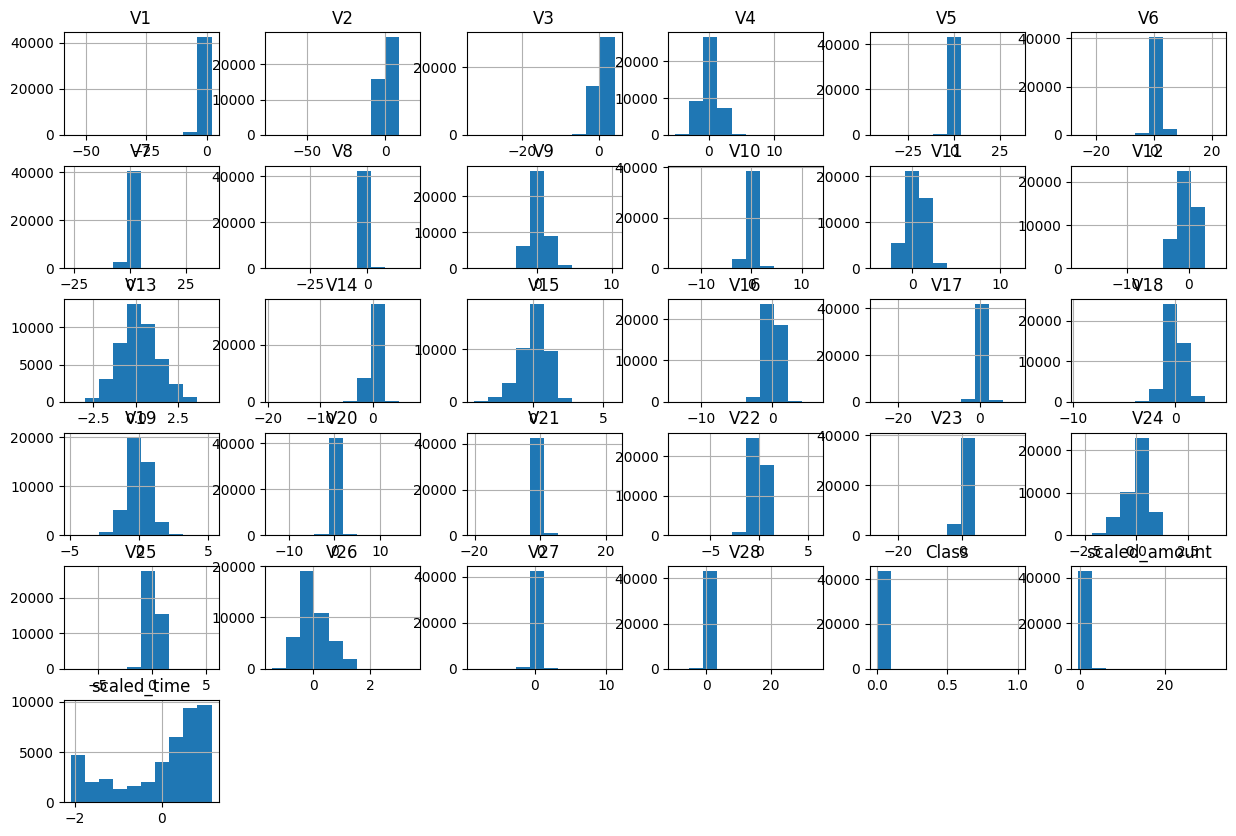

In [11]:
credit.hist(figsize=(15, 10))
plt.show()

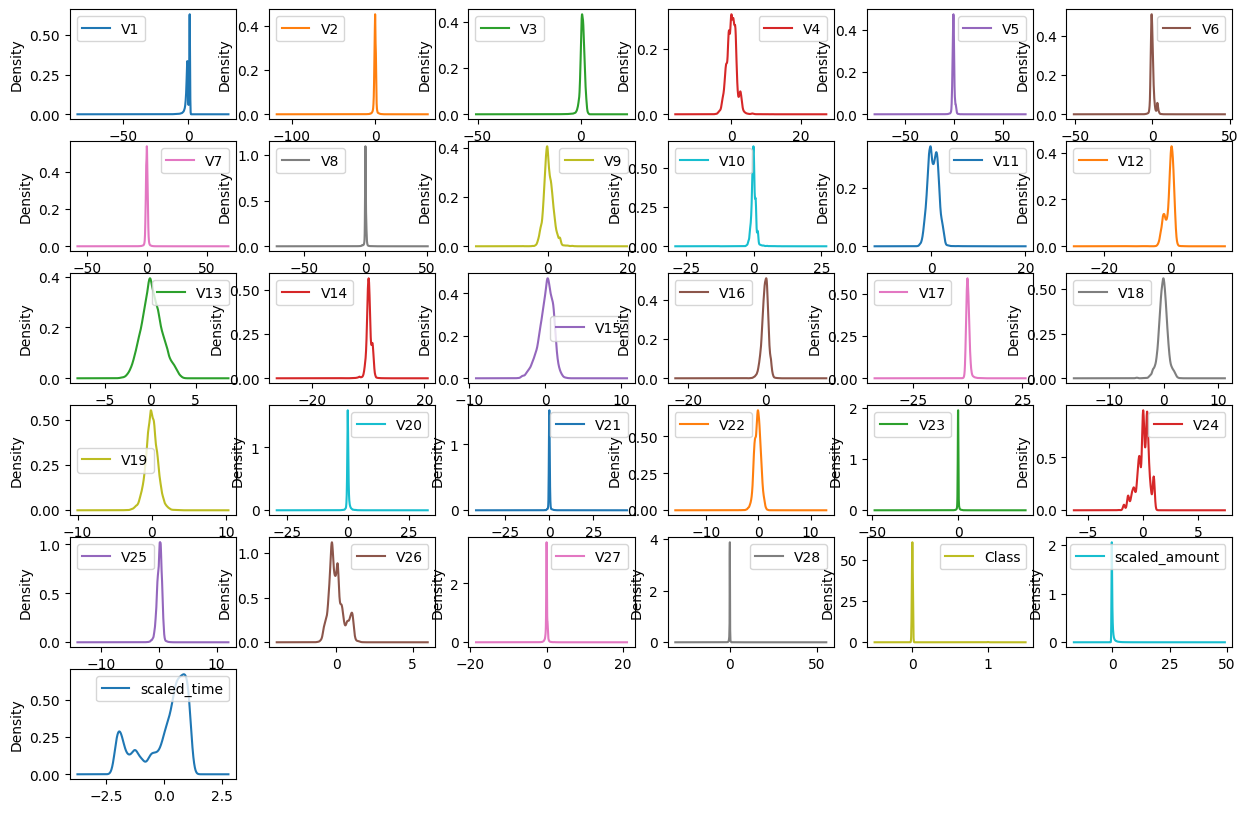

In [12]:
import math
n_features = len(credit.columns)
layout_rows = math.ceil(math.sqrt(n_features))
layout_cols = math.ceil(n_features / layout_rows)
credit.plot(kind='density', subplots=True, layout=(layout_rows, layout_cols), sharex=False, figsize=(15, 10))
plt.show()


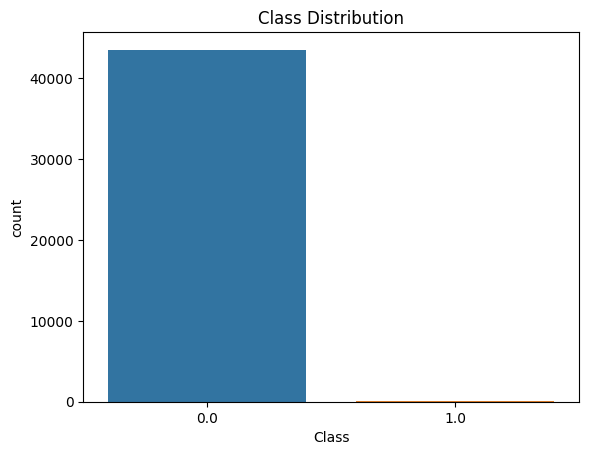

In [13]:
sns.countplot(data=credit, x='Class')
plt.title('Class Distribution')
plt.show()


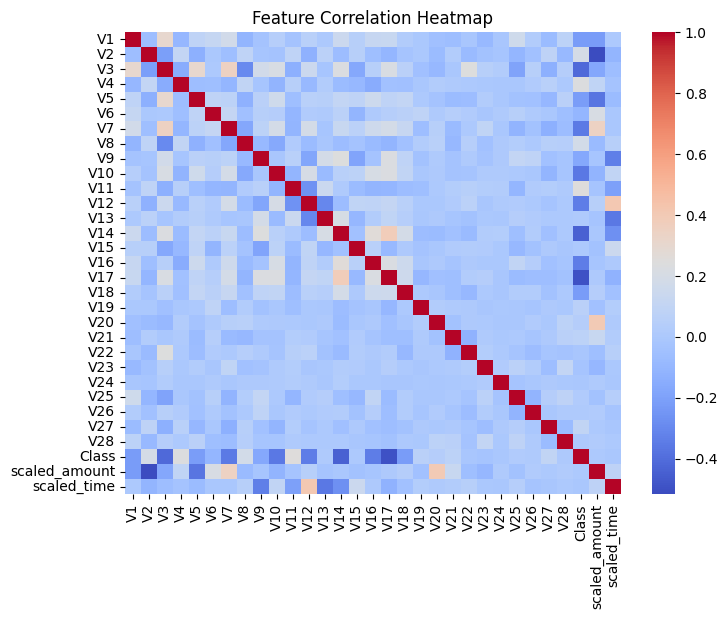

In [15]:
correlation_matrix = credit.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


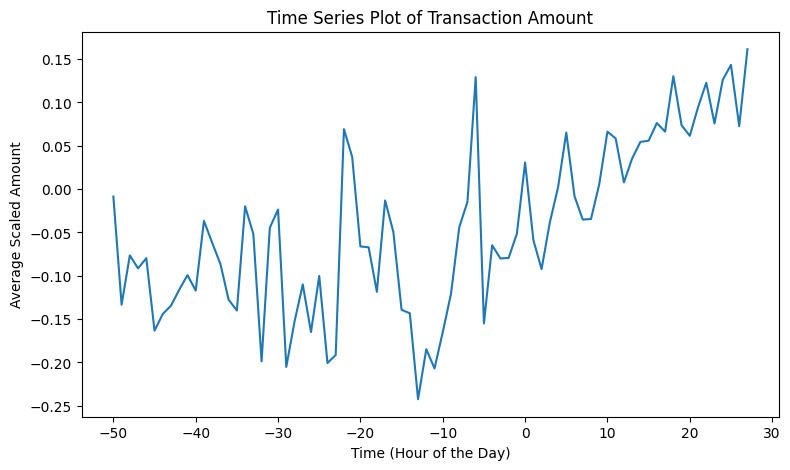

In [20]:
credit['TransactionHour'] = credit['scaled_time'].apply(lambda x: int(x * 24))
df_agg = credit.groupby('TransactionHour')['scaled_amount'].mean().reset_index()

plt.figure(figsize=(9, 5))
plt.plot(df_agg['TransactionHour'], df_agg['scaled_amount'],  linestyle='-')
plt.xlabel('Time (Hour of the Day)')
plt.ylabel('Average Scaled Amount')
plt.title('Time Series Plot of Transaction Amount')
plt.show()


TRAINING THE DATA SET

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Check for NaN values in y_train
nan_indices = np.isnan(y_train)
print("Number of NaN values in y_train:", np.sum(nan_indices))

# Remove samples with NaN values
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Now, you can proceed with oversampling
oversampler = RandomOverSampler(sampling_strategy=0.5)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


Number of NaN values in y_train: 1


In [25]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
30357,-0.690399,0.155621,1.539356,-2.064752,-1.155663,-0.487872,-0.793529,0.725040,1.099993,-1.459866,...,0.431315,1.102730,-0.141239,0.020607,-0.600723,0.067397,0.060957,0.076019,-0.365560,0.702135
35295,1.114742,0.061822,1.533625,1.459828,-1.147879,-0.486329,-0.471939,-0.007701,0.687983,-0.235149,...,-0.014189,0.216001,0.047215,0.945932,0.380639,-0.445427,0.080366,0.046095,-0.336874,0.871157
993,1.178610,0.203177,0.584159,0.712158,-0.507373,-0.872611,0.057069,-0.119321,-0.000022,-0.098498,...,-0.140014,-0.373527,0.174243,0.609291,0.168950,0.170186,-0.019439,0.017534,-0.353985,-2.039686
31258,0.689722,-0.627751,-0.048087,1.337946,-0.428643,-0.175747,0.329860,0.067381,0.076786,0.006051,...,0.180501,0.068052,-0.293264,0.205717,0.570627,-0.295964,-0.031981,0.039125,0.617961,0.733427
326,-0.992404,1.626591,0.960248,0.091999,-0.237963,-0.550796,0.108649,-0.378490,-0.694480,-0.745466,...,0.602090,-0.693278,0.209737,0.365068,-0.195155,0.086514,0.183661,0.043364,-0.341068,-2.079639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-3.380582,3.298020,-2.181205,-1.289386,1.221429,3.060192,-1.010814,2.195234,2.051711,1.375252,...,-0.712043,-1.313836,0.184181,0.839128,0.400770,-0.013837,-0.203006,-0.644755,-0.318924,-1.523331
11284,-0.247756,1.254309,1.178603,1.290727,0.496781,-0.605885,0.957472,-0.253849,0.280065,-0.538691,...,0.034756,0.432613,-0.127321,0.368686,-0.192946,-0.271823,0.137655,0.143735,-0.318001,-0.567253
38158,1.252832,-0.394117,0.675035,0.070001,-0.924602,-0.314198,-0.596392,0.051904,1.152197,-0.334561,...,-0.003711,0.157498,-0.133752,-0.030233,0.381916,1.216758,-0.054500,0.002612,-0.307684,0.966282
860,-0.833568,0.606174,-0.051329,-2.091447,0.968764,-0.030220,0.887288,0.099009,0.834622,-1.031219,...,0.320782,1.239559,0.192074,-0.621025,-0.843584,-0.835690,0.164384,0.274361,-0.337251,-2.047177


In [26]:
y_train

30357    0.0
35295    0.0
993      0.0
31258    0.0
326      0.0
        ... 
6265     0.0
11284    0.0
38158    0.0
860      0.0
15795    0.0
Name: Class, Length: 34930, dtype: float64

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_pred = rf_classifier.predict(X_test)


EVALUATING THE MODEL

In [28]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[8700    0]
 [   6   27]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8700
         1.0       1.00      0.82      0.90        33

    accuracy                           1.00      8733
   macro avg       1.00      0.91      0.95      8733
weighted avg       1.00      1.00      1.00      8733


Accuracy Score:
0.9993129508759876


VISUALIZING THE MODEL

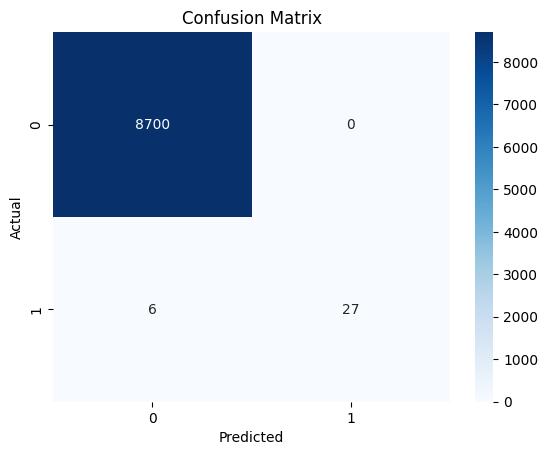

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


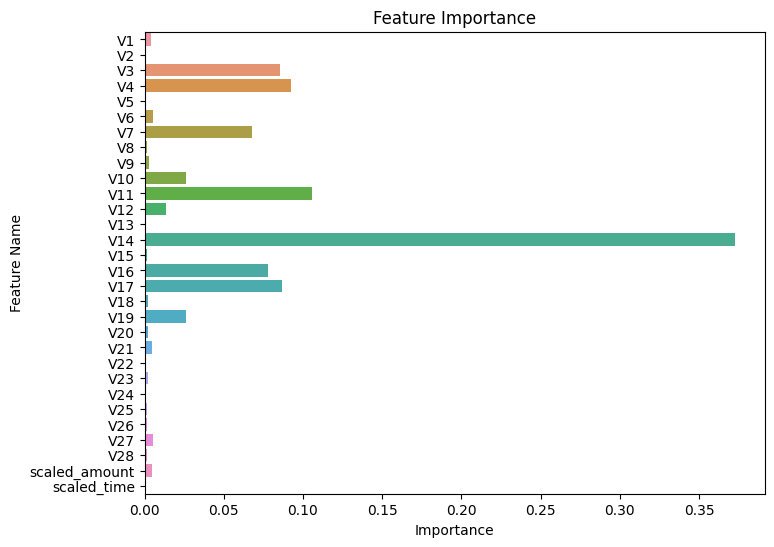

In [31]:
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()
